In [42]:
# paths
workspace = '/Users/brian/code/zv/zv'

# It appears that installation of GDAL somehow breaks shapely,
# leading to Geometry errors like:
# Shell is not a LinearRing
# ValueError: Null geometry supports no operations
# /Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade --no-deps --force-reinstall fiona

import sys
#!{sys.executable} -m pip install wget
# !{sys.executable} -m pip install fiona
# !{sys.executable} -m pip install shapely
# !{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install tqdm

In [2]:
import time
import json
import pprint as pp

from IPython.display import display, Markdown, Latex
#display(Markdown('*some markdown* $\phi$'))

import pandas as pd
from IPython.display import display, HTML

from shapely.geometry import box
import shapely.geometry

from gbdxtools import Interface
gbdx = Interface()

from gbdxtools.task import env
from gbdxtools import CatalogImage, WV03_VNIR, WV03_SWIR  

%matplotlib inline

In [128]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot(image, w=30, h=24, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('off')
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.show()

def climplot(image,lower,upper, w=15, h=20,  cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('off')
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.clim(lower, upper)
    plt.show()
    

In [121]:
# This is an IMAGE search

#Flying Fox road
wkt_string="POLYGON ((153.12975883483887 -28.13111173310014, 153.24236869812012 -28.13111173310014, 153.24236869812012 -28.053424036910094, 153.12975883483887 -28.053424036910094, 153.12975883483887 -28.13111173310014))"


types = [ "DigitalGlobeAcquisition" ]


cresults = gbdx.catalog.search(searchAreaWkt=wkt_string,
                          startDate="2016-08-16T00:00:00.000Z",
                          endDate="2018-08-16T00:00:00.000Z",
                          types=types)

len(cresults)

156

In [122]:
v =pd.io.json.json_normalize(cresults)
#display(v)

In [119]:
#list(v)

In [123]:
display(v[['properties.cloudCover','properties.sensorPlatformName','properties.timestamp','properties.browseURL',
 'properties.catalogID']])

properties.cloudCover properties.sensorPlatformName  \
0                       39              WORLDVIEW03_VNIR   
1                       17              WORLDVIEW03_VNIR   
2                        0              WORLDVIEW03_VNIR   
3                        0              WORLDVIEW03_VNIR   
4                        0              WORLDVIEW03_SWIR   
5                        0              WORLDVIEW03_SWIR   
6                        0              WORLDVIEW03_SWIR   
7                       90              WORLDVIEW03_VNIR   
8                       91              WORLDVIEW03_VNIR   
9                        0              WORLDVIEW03_SWIR   
10                      33                   WORLDVIEW02   
11                     100                   WORLDVIEW01   
12                      38                   WORLDVIEW01   
13                     100                   WORLDVIEW01   
14                      34              WORLDVIEW03_VNIR   
15                      45              WORLDVIEW03_VNIR   
16                      13                   WORLDVIEW01   
17                       0              WORLDVIEW03_SWIR   
18                      28                   WORLDVIEW02   
19                     100                   WORLDVIEW01   
20                      35                   WORLDVIEW02   
21                      35                   WORLDVIEW02   
22                      34                   WORLDVIEW01   
23                      29                   WORLDVIEW01   
24                      81                   WORLDVIEW02   
25                     100                   WORLDVIEW01   
26                     100                   WORLDVIEW01   
27                      97              WORLDVIEW03_VNIR   
28                      37                   WORLDVIEW01   
29                      75                   WORLDVIEW02   
..                     ...                           ...   
126                     28                   WORLDVIEW02   
127                     23                   WORLDVIEW02   
128                      0              WORLDVIEW03_SWIR   
129                    100                   WORLDVIEW02   
130                      2                   WORLDVIEW02   
131                     66                   WORLDVIEW02   
132                      0                      GEOEYE01   
133                     49                   WORLDVIEW02   
134                     12                   WORLDVIEW01   
135                     59              WORLDVIEW03_VNIR   
136                     22                   WORLDVIEW01   
137                     72                   WORLDVIEW02   
138                      0                   WORLDVIEW02   
139                      8                   WORLDVIEW02   
140                     18                      GEOEYE01   
141                     23              WORLDVIEW03_VNIR   
142                      2                      GEOEYE01   
143                     80                   WORLDVIEW01   
144                     26                   WORLDVIEW01   
145                      0                   WORLDVIEW02   
146                      1              WORLDVIEW03_SWIR   
147                      7                   WORLDVIEW02   
148                      2              WORLDVIEW03_VNIR   
149                      0                   WORLDVIEW02   
150                     31              WORLDVIEW03_SWIR   
151                     24                   WORLDVIEW01   
152                      2              WORLDVIEW03_VNIR   
153                     81              WORLDVIEW03_SWIR   
154                      2              WORLDVIEW03_SWIR   
155                      0              WORLDVIEW03_SWIR   

         properties.timestamp  \
0    2018-06-26T00:20:34.000Z   
1    2018-07-27T00:15:21.000Z   
2    2018-07-08T00:12:39.000Z   
3    2018-07-08T00:13:08.000Z   
4    2018-07-08T00:12:39.000Z   
5    2018-07-08T00:13:08.000Z   
6    2018-06-26T00:20:34.000Z   
7    2018-03-11T00:1

In [124]:
display(v[['properties.sensorPlatformName','properties.timestamp','properties.catalogID']])

properties.sensorPlatformName      properties.timestamp  \
0                WORLDVIEW03_VNIR  2018-06-26T00:20:34.000Z   
1                WORLDVIEW03_VNIR  2018-07-27T00:15:21.000Z   
2                WORLDVIEW03_VNIR  2018-07-08T00:12:39.000Z   
3                WORLDVIEW03_VNIR  2018-07-08T00:13:08.000Z   
4                WORLDVIEW03_SWIR  2018-07-08T00:12:39.000Z   
5                WORLDVIEW03_SWIR  2018-07-08T00:13:08.000Z   
6                WORLDVIEW03_SWIR  2018-06-26T00:20:34.000Z   
7                WORLDVIEW03_VNIR  2018-03-11T00:16:38.000Z   
8                WORLDVIEW03_VNIR  2018-02-20T00:13:32.000Z   
9                WORLDVIEW03_SWIR  2018-02-20T00:13:32.000Z   
10                    WORLDVIEW02  2018-01-03T23:39:33.000Z   
11                    WORLDVIEW01  2018-01-01T03:05:00.000Z   
12                    WORLDVIEW01  2018-01-27T02:51:56.000Z   
13                    WORLDVIEW01  2018-03-06T03:00:57.000Z   
14               WORLDVIEW03_VNIR  2018-02-26T00:10:09.000Z   
15               WORLDVIEW03_VNIR  2018-02-26T00:09:05.000Z   
16                    WORLDVIEW01  2018-01-31T02:57:55.000Z   
17               WORLDVIEW03_SWIR  2018-02-01T00:10:05.000Z   
18                    WORLDVIEW02  2018-03-04T00:10:40.000Z   
19                    WORLDVIEW01  2018-03-06T03:01:44.000Z   
20                    WORLDVIEW02  2018-03-31T00:19:19.000Z   
21                    WORLDVIEW02  2018-03-31T00:18:08.000Z   
22                    WORLDVIEW01  2018-02-17T02:59:01.000Z   
23                    WORLDVIEW01  2018-02-17T02:59:44.000Z   
24                    WORLDVIEW02  2018-02-24T00:05:36.000Z   
25                    WORLDVIEW01  2018-03-02T02:56:20.000Z   
26                    WORLDVIEW01  2018-03-02T02:55:11.000Z   
27               WORLDVIEW03_VNIR  2018-02-01T00:10:05.000Z   
28                    WORLDVIEW01  2018-01-27T02:52:49.000Z   
29                    WORLDVIEW02  2018-04-05T23:57:22.000Z   
..                            ...                       ...   
126                   WORLDVIEW02  2017-03-02T23:51:50.313Z   
127                   WORLDVIEW02  2017-04-06T23:58:46.486Z   
128              WORLDVIEW03_SWIR  2017-04-08T00:12:10.662Z   
129                   WORLDVIEW02  2017-05-12T00:06:08.000Z   
130                   WORLDVIEW02  2017-02-22T23:46:10.603Z   
131                   WORLDVIEW02  2017-12-28T23:59:55.000Z   
132                      GEOEYE01  2017-03-10T00:01:41.085Z   
133                   WORLDVIEW02  2017-01-02T00:05:37.576Z   
134                   WORLDVIEW01  2017-03-01T02:54:39.742Z   
135              WORLDVIEW03_VNIR  2017-04-08T00:12:34.859Z   
136                   WORLDVIEW01  2017-01-26T02:52:43.751Z   
137                   WORLDVIEW02  2017-03-24T00:15:17.665Z   
138                   WORLDVIEW02  2017-02-17T00:07:36.443Z   
139                   WORLDVIEW02  2017-04-06T23:58:58.836Z   
140                      GEOEYE01  2017-02-04T23:48:57.485Z   
141              WORLDVIEW03_VNIR  2017-10-24T00:10:10.000Z   
142                      GEOEYE01  2017-03-10T00:02:51.085Z   
143                   WORLDVIEW01  2017-04-21T02:55:21.000Z   
144                   WORLDVIEW01  2016-09-24T02:52:59.538Z   
145                   WORLDVIEW02  2016-10-04T23:51:09.474Z   
146              WORLDVIEW03_SWIR  2016-11-11T00:23:43.017Z   
147                   WORLDVIEW02  2016-10-15T23:45:18.240Z   
148              WORLDVIEW03_VNIR  2016-11-11T00:23:42.164Z   
149                   WORLDVIEW02  2016-10-04T23:52:24.824Z   
150              WORLDVIEW03_SWIR  2016-08-16T00:14:48.725Z   
151                   WORLDVIEW01  2016-09-24T02:53:39.693Z   
152              WORLDVIEW03_VNIR  2016-09-22T00:14:32.316Z   
153              WORLDVIEW03_SWIR  2016-11-17T00:20:59.162Z   
154              WORLDVIEW03_SWIR  2016-09-22T00:14:33.171Z   
155              WORLDVIEW03_SWIR  2016-11-29T00:15:09.449Z   

    properties.catalogID  
0       104001003F103400  
1       104001003FC6C400  
2       10400100

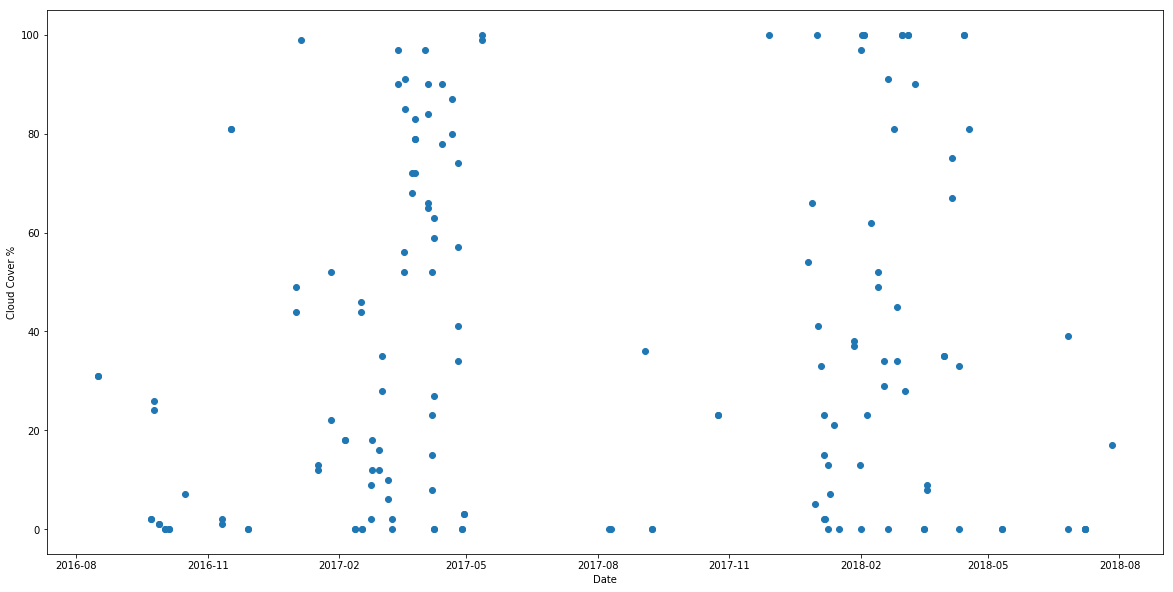

In [127]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#plt.plot(x=v[['properties.timestamp']],y=v[['properties.cloudCover']])
#v[['properties.timestamp']]
#plt.plot_date(x=days, y=impressions)
cc = v[['properties.cloudCover']]
ts = v[['properties.timestamp']]

plt.figure(figsize=(20, 10))
plt.plot_date(x=ts,y=cc)
plt.xlabel("Date")
plt.ylabel("Cloud Cover %")

In [125]:
pp.pprint(cresults[3])

{'identifier': '104001003EAC0500',
 'properties': {'browseURL': 'https://api.discover.digitalglobe.com/show?id=104001003EAC0500&f=jpeg',
                'catalogID': '104001003EAC0500',
                'cloudCover': 0,
                'footprintWkt': 'MULTIPOLYGON(((153.0834069 -27.04007771, '
                                '153.2423343 -27.05735615, 153.2423092 '
                                '-27.09070434, 153.242277 -27.12404789, '
                                '153.2422344 -27.1573831, 153.2421752 '
                                '-27.1906877, 153.242108 -27.2239138, '
                                '153.2420674 -27.25713589, 153.2420328 '
                                '-27.29036576, 153.241981 -27.3235654, '
                                '153.2419153 -27.35673439, 153.2418595 '
                                '-27.38988773, 153.2418053 -27.42301583, '
                                '153.2417623 -27.45613205, 153.241743 '
                                '-27.48926513, 1

In [28]:
pp.pprint(cresults[5])

{'identifier': '104A01003EAC0500',
 'properties': {'browseURL': 'https://api.discover.digitalglobe.com/show?id=104A01003EAC0500&f=jpeg',
                'catalogID': '104A01003EAC0500',
                'cloudCover': 0,
                'footprintWkt': 'MULTIPOLYGON(((153.0973067 -26.96902434, '
                                '153.2257582 -26.98402056, 153.2257376 '
                                '-27.02411242, 153.2257065 -27.06419654, '
                                '153.2256496 -27.10424237, 153.2255806 '
                                '-27.14418075, 153.2255489 -27.18412753, '
                                '153.2255111 -27.22406204, 153.2254457 '
                                '-27.26394529, 153.2253875 -27.30380123, '
                                '153.2253404 -27.34363039, 153.225297 '
                                '-27.38343341, 153.2252524 -27.42322443, '
                                '153.2252097 -27.46297021, 153.225241 '
                                '-27.50276

In [34]:
wv3vnir = cresults[3]["properties"]["footprintWkt"]
wv3swir = cresults[5]["properties"]["footprintWkt"]

In [ ]:
def getlink(r,v):
    rstr = ''
    if v.at[r,'properties.sensorPlatformName'] == 'WORLDVIEW03_VNIR':
        cid = str(v.at[r,'properties.catalogID'])
        cc = str(v.at[r,'properties.cloudCover'])
        turl = str(v.at[r,'properties.browseURL'])
        ts = str(v.at[r,'properties.timestamp'])
        rstr = '['+ cid + ' ' + cc + ' ' + ts +'](' + turl +")" 
    return rstr
 
b = [getlink(n,v) for n in range(len(cresults))]
    
bstr = '\n'.join(b)    
#display(Markdown(bstr))



In [7]:
# ordering VNIR
cat_ids = ['104001003EAC0500']
order_id = gbdx.ordering.order(cat_ids)
print(order_id)          

2abb01fe-426c-464f-9e24-dd997405835f


# Order States

[https://gbdxdocs.digitalglobe.com/docs/ordering-course-v2](https://gbdxdocs.digitalglobe.com/docs/ordering-course-v2)

## Orders can have the following states:

| Order Status | Description |
|--------------|-------------|
| submitted | The order has been submitted to the GBDX platform |
| ordering | The Acquisition IDs are being ordered from the DigitalGlobe (DG) factory |
| placed | The order has been placed with the DG factory | 
| delivered | The Acquisition ID has been delivered from the DG factory and is available |
|failed | The order failed.

In [8]:
order_status = gbdx.ordering.status(order_id)
pp.pprint(order_status)

[{'acquisition_id': '104001003EAC0500',
  'location': 'not_delivered',
  'state': 'submitted'}]


In [13]:
order_status = gbdx.ordering.status(order_id)
pp.pprint(order_status)

[{'acquisition_id': '104001003EAC0500',
  'location': 'not_delivered',
  'state': 'ordering'}]


In [14]:
order_status = gbdx.ordering.status(order_id)
pp.pprint(order_status)

[{'acquisition_id': '104001003EAC0500',
  'location': 'not_delivered',
  'state': 'placed'}]


In [27]:
order_status = gbdx.ordering.status(order_id)
pp.pprint(order_status)

[{'acquisition_id': '104001003EAC0500',
  'location': 's3://receiving-dgcs-tdgplatform-com/058330011010_01_003',
  'state': 'delivered'}]


In [5]:
order_status = gbdx.ordering.status('2abb01fe-426c-464f-9e24-dd997405835f')
pp.pprint(order_status)

[{'acquisition_id': '104001003EAC0500',
  'location': 's3://receiving-dgcs-tdgplatform-com/058330011010_01_003',
  'state': 'delivered'}]


In [5]:
#catalog_id = env.inputs.get('catalog_id','104001003EAC0500')
#  bbox must be in the form of: minx, miny, maxx, maxy
#(or rather left, lower, right, upper) and be in EPSG:4326 coordinates

#bb = [153.1298, -28.13111, 153.2424, -28.05342]
bb = [153.00234,-28.093722,153.259317,-27.986452]

#153.105469,-28.107137],[153.239078,-28.107137],[153.239078,-28.035471],[153.105469,-28.035471],[153.105469,-28.107137]]

bb = [153.105469,-28.035471,153.239078,-28.107137]


img = CatalogImage('104001003EAC0500', bbox=bb)
#img.plot()

# or call read directly to get a numpy array:
#nd_array = img.read()
#print(nd_array.shape)

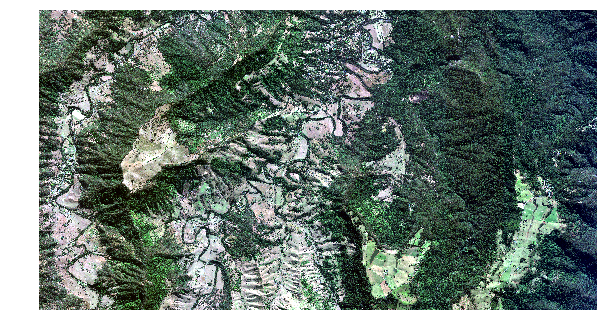

In [6]:
img.plot()

In [7]:
nda = img.read()
print(nda.shape)

(8, 5529, 10307)


In [98]:
# Small function to plot figures with colorbars:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def myplot(image, w=15, h=12, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('off')
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.show()

In [9]:
# gbdx.s3.info # Will print secret key

In [7]:
# Here, we order that our image of interest be placed on s3 for download: (~60GB TIFF file)
data = "s3://receiving-dgcs-tdgplatform-com/058330011010_01_003" # Flying Fox Road
aoptask = gbdx.Task("AOP_Strip_Processor", data=data, enable_acomp=True, enable_pansharpen=True)
workflow = gbdx.Workflow([ aoptask ])
workflow.savedata(aoptask.outputs.data, location='GoldCoast')
workflow.execute()

'4933824227434189438'

In [8]:
workflow.status

{'event': 'scheduled', 'state': 'pending'}

In [3]:
# So maybe notebook crashes while GBDX workflow is running.  We can recover it with 
# the workflow ID, if we know it:
workflow = gbdx.Workflow( [] )  # instantiate a blank workflow
workflow.id = '4933824227434189438'

In [9]:
workflow.status

{'event': 'succeeded', 'state': 'complete'}

In [19]:
# odering SWIR
cat_ids = ['104A01003EAC0500']
order_id = gbdx.ordering.order(cat_ids)
print(order_id)

ff67bee8-a140-4f0e-ae0b-da633b5346e4


In [20]:
order_status = gbdx.ordering.status(order_id)
pp.pprint(order_status)

[{'acquisition_id': '104A01003EAC0500',
  'location': 's3://receiving-dgcs-tdgplatform-com/058255420010_01_003',
  'state': 'delivered'}]


In [21]:
bb = [153.105469,-28.035471,153.239078,-28.107137]
img_swir = CatalogImage('104A01003EAC0500', bbox=bb)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gbdxtools/images/meta.py:440: UserWarning: Image does not contain specified geometry (153.105469, -28.107137, 153.239078, -28.035471) not in (153.09762104342795, -28.243627935598276, 153.22548206570607, -26.96952719)
  warnings.warn(ae.args)


So the VNIR and SWIR images have slightly different geometries.
Below, we calculate the intersection of their bounding boxes.

In [50]:
CatalogImage('104A01003EAC0500').bounds

(153.09762104342795, -28.243627935598276, 153.22548206570607, -26.96952719)

In [51]:
CatalogImage('104001003EAC0500').bounds

(153.08321592, -28.379511108505213, 153.2423581316421, -27.040393627369745)

In [67]:
a = box(153.09762104342795, -28.243627935598276, 153.22548206570607, -26.96952719)
b = box(153.08321592, -28.379511108505213, 153.2423581316421, -27.040393627369745)
# The intersection
print(a.intersection(b).bounds)

(153.09762104342795, -28.243627935598276, 153.22548206570607, -27.040393627369745)


In [68]:
bb = [153.09762104342795, -28.243627935598276, 153.22548206570607, -27.040393627369745]
img_swir = CatalogImage('104A01003EAC0500', bbox=bb)

In [8]:
bb = [153.09762104342795, -28.243627935598276, 153.22548206570607, -27.040393627369745]
img_vnir = CatalogImage('104001003EAC0500', bbox=bb)

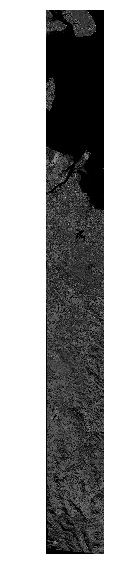

In [70]:
img_swir.plot()

In [186]:
bb = [153.09762104342795, -28.0, 153.22548206570607, -27.040393627369745]
img_swir2 = CatalogImage('104A01003EAC0500', bbox=bb)
img_vnir2 = CatalogImage('104001003EAC0500', bbox=bb)

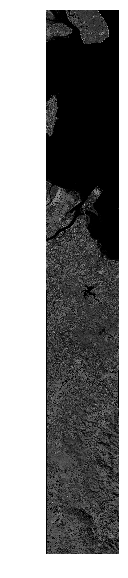

In [185]:
img_swir2.plot()

In [3]:
bb = [153.19762104342795, -28.15, 153.22048206570607, -28.1]
img_swir2 = CatalogImage('104A01003EAC0500', bbox=bb)
img_vnir2 = CatalogImage('104001003EAC0500', bbox=bb,acomp=True)

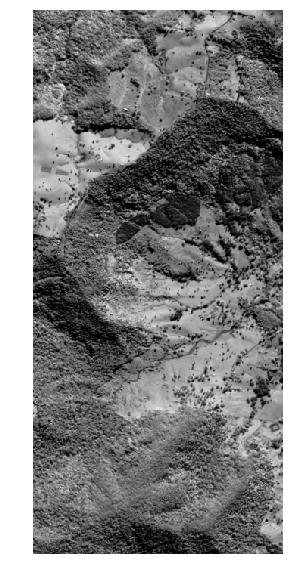

In [195]:
img_swir2.plot()

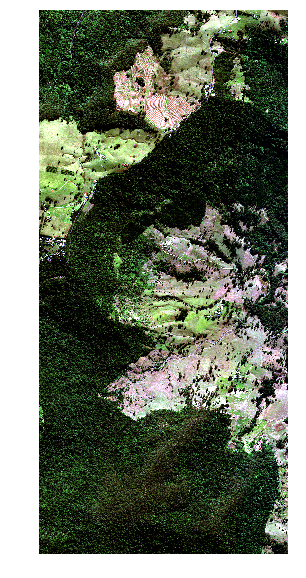

In [208]:
img_vnir2.plot()

In [158]:
img_swir2.shape

(8, 1441, 330)

In [143]:
# The definition of spectral regions varies between fields and can be debated.
# For these purposes, the following definitions are used:
# XX = Atmospherically opaque region
#
#|---------------VNIR------------------|
#|                    |-----------------------IR-------------------------|
#|----- VIS ----------|-RE-|----NIR----|--SWIR---|XX|-SWIR-|XXXX|--SWIR--|
#|   C  B    G  Y  R    RE   N1     N2   S1          S2/3/4      S5/6/7/8|
#| 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0 | 1.3 | 1.5 | 1.8 | 2.0 | 2.5 |

# Very Near InfraRed
# 'WV03_MULTI' 
# 0 coastal 427.38,
# 1 blue 481.92,
# 2 green 547.14,
# 3 yellow 604.28,
# 4 red 660.11,
# 5 rededge 722.73,
# 6 nir1 824.04,
# 7 nir2 913.65


#  Short Wavelength InfraRed 
# 'WV03_ALL-S' 
# 0 SWIR 1  1209.06,
# 1 SWIR 2  1571.61,
# 2 SWIR 3  1661.10,
# 3 SWIR 4  1729.54,
# 4 SWIR 5  2163.69,
# 5 SWIR 6  2202.16,
# 6 SWIR 7  2259.32,
# 7 SWIR 8  2329.22


# Coastal: 400 - 450 nm
# Blue: 450 - 510 nm
# Green: 510 - 580 nm
# Yellow: 585 - 625 nm
# Red: 630 - 690 nm
# Red Edge: 705 - 745 nm
# Near-IR1: 770 - 895 nm
# Near-IR2: 860 - 1040 nm


# SWIR-1: 1195 - 1225 nm
# SWIR-2: 1550 - 1590 nm
# SWIR-3: 1640 - 1680 nm
# SWIR-4: 1710 - 1750 nm
# SWIR-5: 2145 - 2185 nm
# SWIR-6: 2185 - 2225 nm
# SWIR-7: 2235 - 2285 nm
# SWIR-8: 2295 - 2365 nm


#  0.0161 * ((R672/(R550*R708)) ** 0.7784)
#v3/(v2*v5)
# red/green*rededge

# 0.0337 * (R672/R550) ** 1.8695
#v7/s0

#0.08 * ((R850-R2218)/(R850-R1928)) - 0.052
#v7-v1/v7

#0.045 * ((R850-R1718)/(R850-R1928)) - 0.014
#v7-v0/v7-v1

def calc_ecarr(red,green,rededge):
    ecarr = 0.0161 * ((red/(green*rededge)) ** 0.7784)
    return(ecarr)

# 7,3,1
def calc_ewdd2(nir2,yellow,blue):
    ewdd2 = 0.045 * ((nir2-yellow)/(nir2-blue)) - 0.014
    return(ewdd2)

In [71]:
#swir_1 = img_swir2[3,:,:]
#nir = img_vnir2[6,:,:]
# nir1 swir4

# 'WV03_MULTI' 
# coastal 427.38,
coastal = img_vnir2[0,:,:]
# blue 481.92,
blue = img_vnir2[1,:,:]
# green 547.14,
green = img_vnir2[2,:,:]
# yellow 604.28,
yellow = img_vnir2[3,:,:]
# red 660.11,
red = img_vnir2[4,:,:]
# rededge 722.73,
rededge = img_vnir2[5,:,:]
# nir1 824.04,
nir1 = img_vnir2[6,:,:]
# nir2 913.65
nir2 = img_vnir2[7,:,:]

# 'WV03_ALL-S' 
# SWIR 1  1209.06,
# SWIR 2  1571.61,
# SWIR 3  1661.10,
# SWIR 4  1729.54,
# SWIR 5  2163.69,
# SWIR 6  2202.16,
# SWIR 7  2259.32,
# SWIR 8  2329.22
# swir_1 = img_swir2[0,:,:]
# swir_2 = img_swir2[1,:,:]
# swir_3 = img_swir2[2,:,:]
#swir_4 = img_swir2[3,:,:]
# swir_5 = img_swir2[4,:,:]
# swir_6 = img_swir2[5,:,:]
# swir_7 = img_swir2[6,:,:]
# swir_8 = img_swir2[7,:,:]

In [ ]:
from skimage.transform import resize
import numpy as np

# NDBI = (SWIR – NIR)/(SWIR + NIR)
#nbdi = (swir_1 - nir_rs)/(swir_1 + nir_rs)

nir_rs = resize(nir1.astype(np.float), swir_4.shape, order=1, mode='constant', clip=True)



In [ ]:
nbdi = (swir4 - nir_rs)/(swir4 + nir_rs)

In [141]:
# YELLOW  1712.07 1748.87 1749.4
#yellow_rs = resize(yellow.astype(np.float), swir_2.shape, order=1, mode='constant', clip=True)
# RED     1535.33 1550.58 1555.11
red_rs = resize(red.astype(np.float), swir_2.shape, order=1, mode='constant', clip=True)
# REDEDGE 1348.08 1303.4  1343.95
rededge_rs = resize(rededge.astype(np.float), swir_2.shape, order=1, mode='constant', clip=True)
# NIR1    1055.94 1063.92 1071.98
nir1_rs = resize( nir1.astype(np.float), swir_2.shape, order=1, mode='constant', clip=True)
# NIR2    858.77  858.632 863.296
nir2_rs = resize( nir2.astype(np.float), swir_2.shape, order=1, mode='constant', clip=True)

In [70]:
#  0.0161 * ((R672/(R550*R708)) ** 0.7784)
#v7/(s0*v7)
#ecarr = 0.0161 * ((band1 / (band4 * band1) ) ** 0.7784)
ecarr_red = 0.0161 * ((red/(green*red)) ** 0.7784)
ecarr_rededge = 0.0161 * ((rededge/(green*rededge)) ** 0.7784)
ecarr_red_rededge = 0.0161 * ((red/(green*rededge)) ** 0.7784)

# (Near_IR1−Red_Edge)/(Near_IR1−Red)



In [85]:
dat1 = (nir1-rededge)/(nir1-red)
# dat4 = red/(green*rededge)
# dat6 = nir1/(green*rededge)

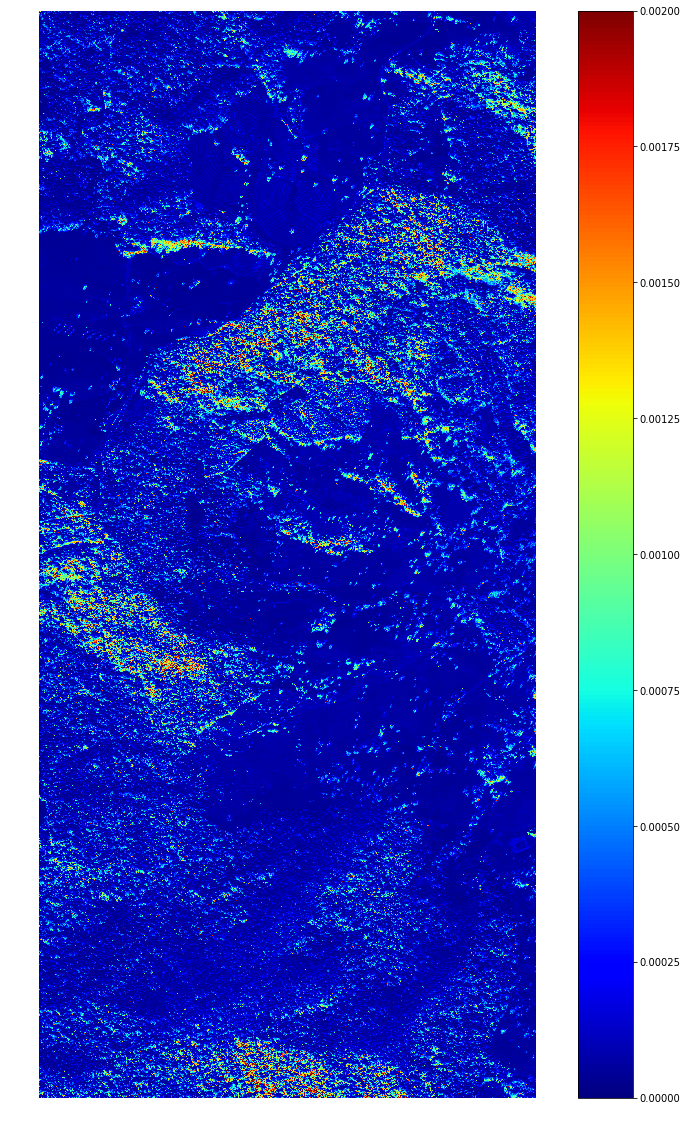

In [105]:

climplot(ecarr_red_rededge,lower=0.0,upper=0.002)

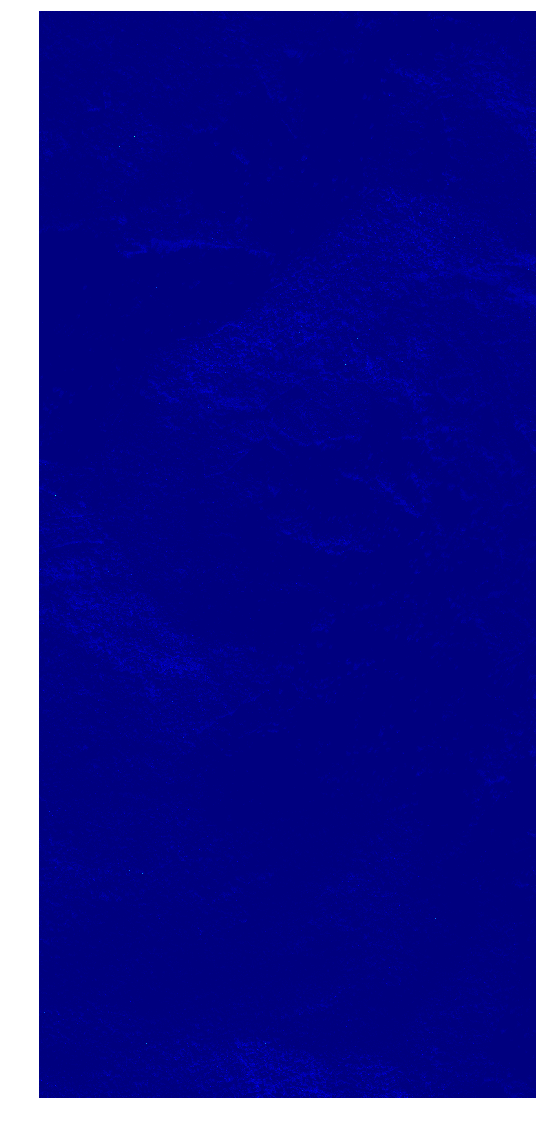

In [96]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def mmplot(image, w=15, h=20, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('off')
    plt.imshow(image, cmap=cmap)
    plt.show()
    
    
mmplot(ecarr_red_rededge)


In [93]:

#(R850-R710)/(R850-R680) 
d1 = (nir2-rededge)/(nir2-red)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/dask/local.py:255: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/dask/local.py:255: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


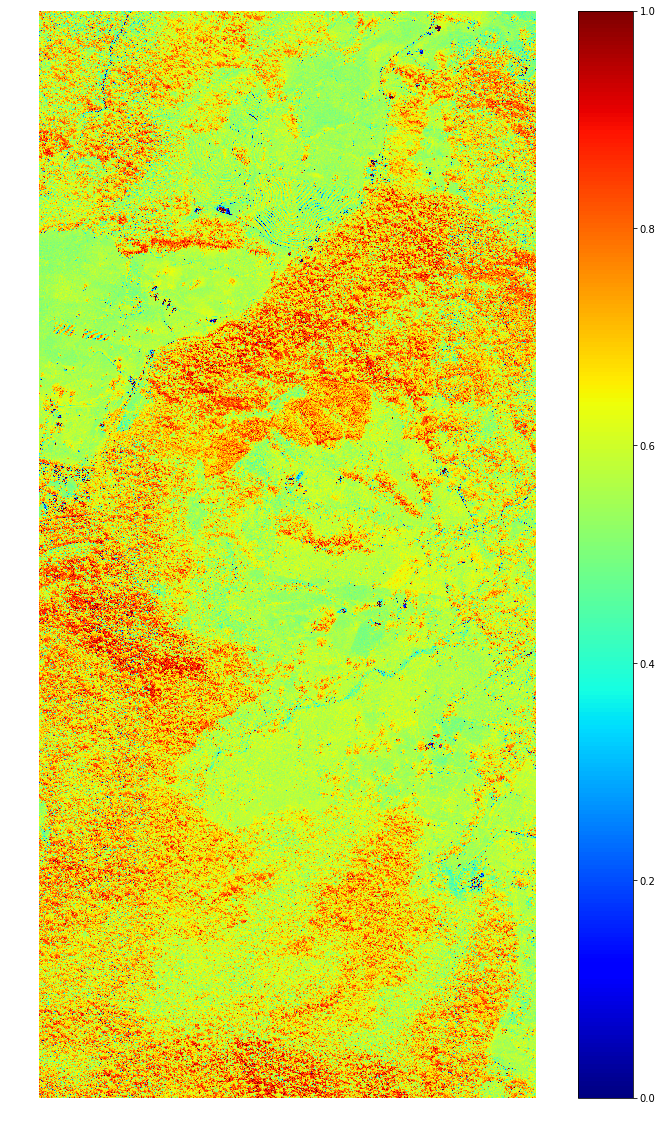

In [118]:
climplot(d1,0.0,1.0)

In [132]:
ewdd2 = 0.045 * ((nir2-yellow)/(nir2-blue)) - 0.014
ewdd2 = ((nir2-yellow)/(nir2-blue)) 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/dask/local.py:255: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


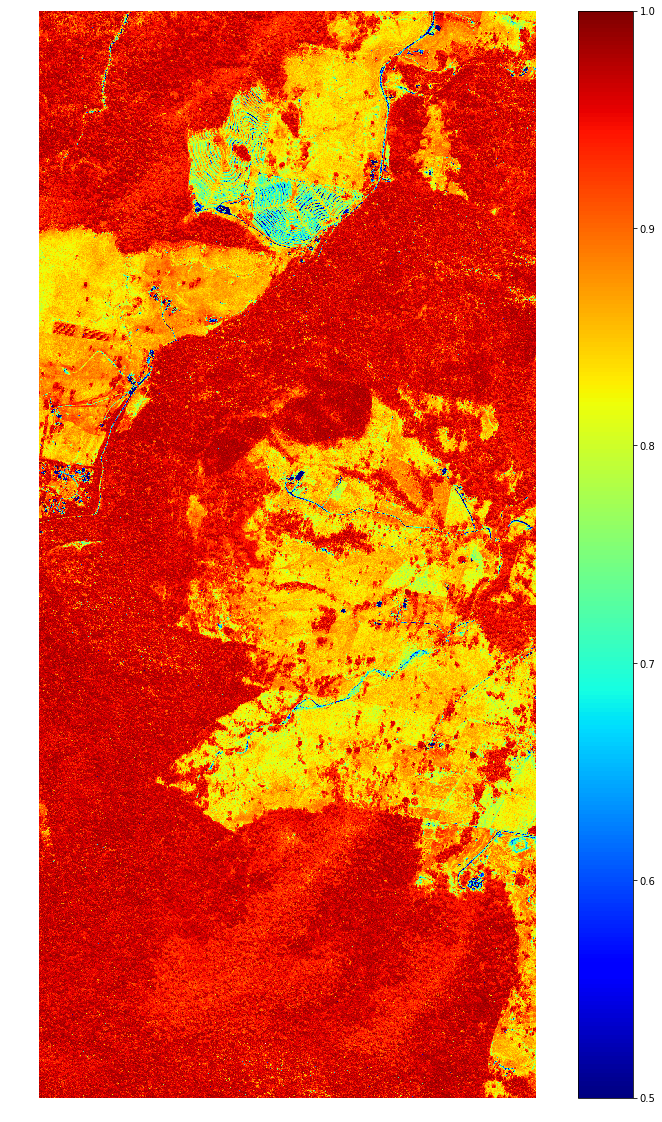

In [136]:
climplot(ewdd2,0.5,1.0)

In [4]:
# A function to calculate NDWI:
def calc_nwdi(green,nir):
    green = green * 2.42173976186e-05
    nir = nir * 4.25585456224e-05
    nvdi = (green - nir )/(nir+green)
    return(nvdi)

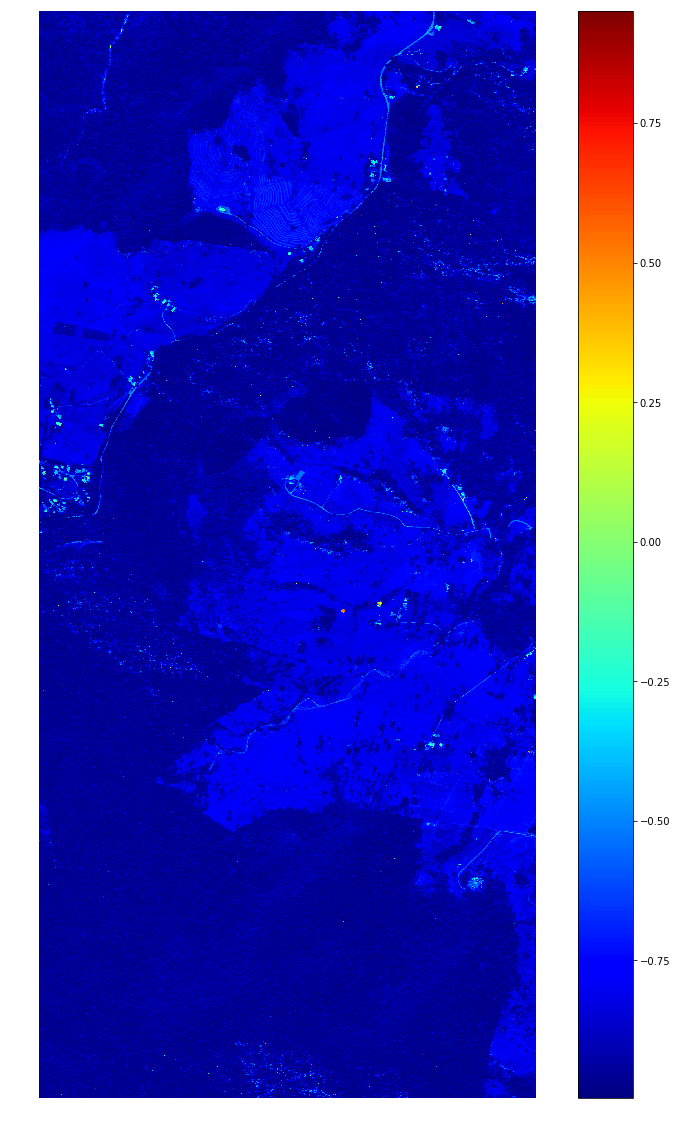

In [14]:
x = calc_nwdi(green,nir1)
mplot(x)

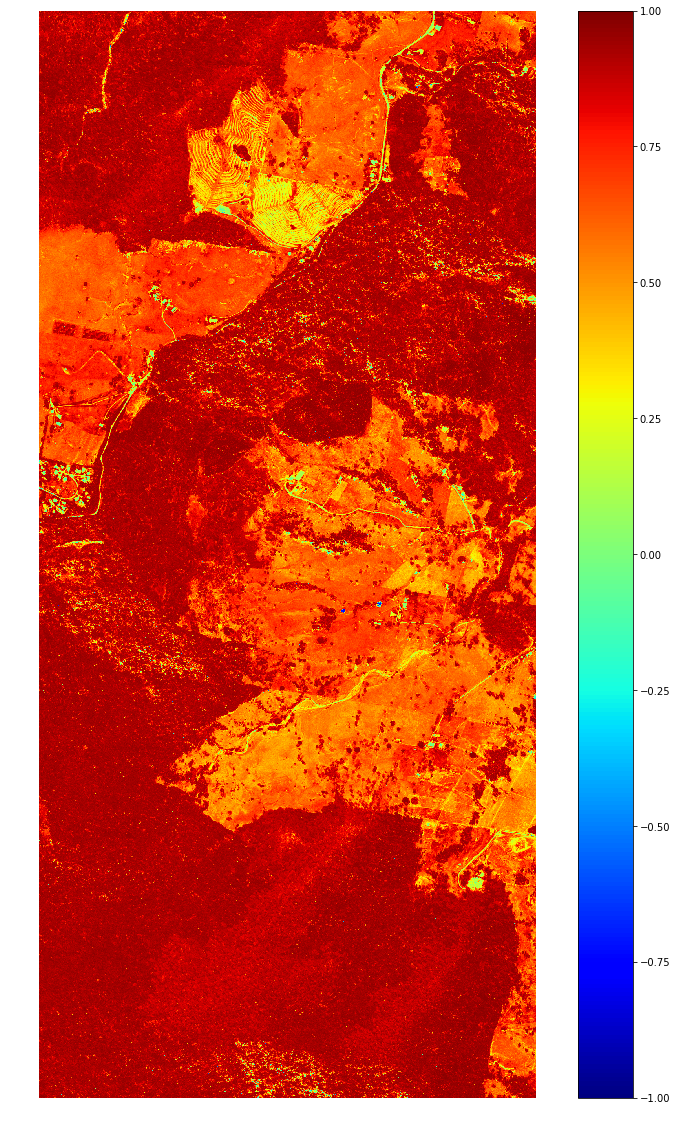

In [139]:
n = (nir1-red)/(nir1+red)
climplot(n,-1.0,1.0)
